## Task 3

You are provided with a small-scale survey data investigating grocery purchasing behavior
and habits.
The task at hand is to cluster the respondents in relatively homogenous groups. Start with all
informative variables in the dataset.

In [65]:
 pip install pyreadstat

In [66]:
# Importing Libraries
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt


In [76]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize

In [67]:
# loading DataFrame
df = pd.read_spss('/content/Explicato_HR_final.sav')
df

,respid,status,q1,q2,hage,q3,q4x1,q4x2,q4x3,q4x4,hq4_1,hq4_2,hq4_3,hq4_4,q5,q6_1,q6_2,q6_3,q6_4,q7_1,q7_2,q7_3,q7_4,q7_5,q7_6,q7_7,q7_8,q7_9,q7_10,q7_10_other,q8_1,q8_2,q8_3,q8_4,q8_5,q8_6,q8_7,q8_8,q8_9,q8_10,...,FAC1_1,FAC2_1,FAC3_1,FAC4_1,FAC5_1,FAC6_1,FAC7_1,q9_1c,q9_2c,q9_3c,q9_4c,q9_5c,q9_6c,q9_7c,q9_8c,q9_9c,q9_10c,q9_11c,q9_12c,q9_13c,q9_14c,q9_15c,q9_16c,q9_17c,q6_1m,q6_2m,q6_3m,q6_4m,q13_6_8,q20_1n,q20_2n,q20_3n,q20_4n,q20_5n,q20_6n,q20_7n,q20_count,q20_final,QCL_1,QCL_2
0,424.0,complete,Muško,33.0,30-34,Da,Jednom svakih par dana,NaN,Dnevno,NaN,Supermarket/ hipermarket (Koliko cesto kupujet...,NaN,"Specijalizirani ducan (koji prodaje, na primje...",NaN,1500.0,80.0,NaN,20.0,NaN,Jednom svakih 3-6 mjeseci,Rjede od svakih 6 mjeseci,Dnevno,Rjede od svakih 6 mjeseci,Jednom svakih 3-6 mjeseci,Rjede od svakih 6 mjeseci,Jednom svaka 2-4 tjedna,Rjede od svakih 6 mjeseci,Jednom svakih par dana,NaN,,Prakticnost pozicije ducana (Koji od sljedecih...,Izbor proizvoda u ducanu (Koji od sljedecih ci...,Cijena proizvoda (Koji od sljedecih cimbenika ...,0,0,0,0,Posebne pogodnosti iz programa vjernosti (Koji...,0,Snižene cijene odabranih proizvoda (Koji od sl...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,10.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2 to 4 activities,NaN,2.0
1,263.0,complete,Muško,27.0,25-29,Da,Jedanput ili dvaput tjedno,Dnevno,Jednom svaka 1-3 mjeseca,Jednom svakih 3-6 mjeseci,Supermarket/ hipermarket (Koliko cesto kupujet...,Mali ducan s kucnim potrepštinama (Koliko cest...,"Specijalizirani ducan (koji prodaje, na primje...",Putem interneta (Koliko cesto kupujete hranu i...,3000.0,60.0,30.0,5.0,5.0,Rjede od svakih 6 mjeseci,Jednom svaka 2-4 tjedna,Jednom svakih par dana,Jednom svakih par dana,Jednom svakih 3-6 mjeseci,Jedanput ili dvaput tjedno,Jednom svaka 2-4 tjedna,Jednom svakih 3-6 mjeseci,Dnevno,NaN,,0,0,Cijena proizvoda (Koji od sljedecih cimbenika ...,0,Radno vrijeme ducana (Koji od sljedecih cimben...,0,Dodatne usluge koje se nude u blizini ducana (...,0,"Promocije proizvoda, kao na primjer “kupiš jed...",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,6.0,0.0,4.0,0.0,10.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,2 to 4 activities,NaN,2.0
2,142.0,complete,Muško,32.0,30-34,Da,Dnevno,Jednom svaka 2-4 tjedna,Jednom svakih par dana,Rjede od svakih 6 mjeseci,Supermarket/ hipermarket (Koliko cesto kupujet...,Mali ducan s kucnim potrepštinama (Koliko cest...,"Specijalizirani ducan (koji prodaje, na primje...",Putem interneta (Koliko cesto kupujete hranu i...,1500.0,80.0,10.0,10.0,0.0,Jednom svakih 3-6 mjeseci,Jednom svaka 2-4 tjedna,Dnevno,Jednom svakih par dana,Jednom svaka 2-4 tjedna,Jednom svaka 2-3 mjeseca,Jednom svaka 2-4 tjedna,Jednom svaka 2-4 tjedna,Dnevno,NaN,,Prakticnost pozicije ducana (Koji od sljedecih...,Izbor proizvoda u ducanu (Koji od sljedecih ci...,Cijena proizvoda (Koji od sljedecih cimbenika ...,Dostupne marke proizvoda (Koji od sljedecih ci...,Radno vrijeme ducana (Koji od sljedecih cimben...,0,0,0,0,Snižene cijene odabranih proizvoda (Koji od sl...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,10.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,2 to 4 activities,NaN,2.0
3,262.0,complete,Muško,46.0,45-50,Da,Dnevno,Jednom svaka 2-4 tjedna,Jedanput ili dvaput tjedno,Jednom svaka 1-3 mjeseca,Supermarket/ hipermarket (Koliko cesto kupujet...,Mali ducan s kucnim potrepštinama (Koliko cest...,"Specijalizirani ducan (koji prodaje, na primje...",Putem interneta (Koliko cesto kupujete hranu i...,1500.0,65.0,5.0,25.0,5.0,Rjede od svakih 6 mjeseci,Jednom svakih 3-6 mjeseci,Jednom svakih par dana,Jedanput ili dvaput tjedno,Jednom svaka 2-4 tjedna,Jednom svaka 2-4 tjedna,Jednom svaka 2-3 mjeseca,Jednom svaka 2-3 mjeseca,Dnevno,NaN,,Prakticnost pozicije ducana (Koji od sljedecih...,Izbor proizvoda u ducanu (Koji od sljedecih ci...,Cijena proizvoda 

In [68]:
pip install googletrans

## Data Preprocessing

In [71]:
df.columns

Index(['respid', 'status', 'q1', 'q2', 'hage', 'q3', 'q4x1', 'q4x2', 'q4x3',
       'q4x4',
       ...
       'q20_2n', 'q20_3n', 'q20_4n', 'q20_5n', 'q20_6n', 'q20_7n', 'q20_count',
       'q20_final', 'QCL_1', 'QCL_2'],
      dtype='object', length=629)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 629 entries, respid to QCL_2
dtypes: category(514), float64(105), object(10)
memory usage: 1.4+ MB


In [73]:
df.describe

<bound method NDFrame.describe of      respid    status      q1  ...              q20_final QCL_1 QCL_2
0     424.0  complete   Muško  ...      2 to 4 activities   NaN   2.0
1     263.0  complete   Muško  ...      2 to 4 activities   NaN   2.0
2     142.0  complete   Muško  ...      2 to 4 activities   NaN   2.0
3     262.0  complete   Muško  ...      2 to 4 activities   NaN   3.0
4    1187.0  complete   Muško  ...                   None   NaN   3.0
..      ...       ...     ...  ...                    ...   ...   ...
995  4771.0  complete  Žensko  ...  5 and more activities   NaN   3.0
996  5564.0  complete  Žensko  ...                   None   NaN   2.0
997   824.0  complete   Muško  ...      2 to 4 activities   NaN   3.0
998  1285.0  complete   Muško  ...      2 to 4 activities   NaN   3.0
999  4126.0  complete  Žensko  ...      2 to 4 activities   NaN   1.0

[1000 rows x 629 columns]>

In [74]:
# Selecting informative variables, Age, Location, Price

df2 = df[['q1','q2','q5','QCL_2']]
df2

,q1,q2,q5,QCL_2
0,Muško,33.0,1500.0,2.0
1,Muško,27.0,3000.0,2.0
2,Muško,32.0,1500.0,2.0
3,Muško,46.0,1500.0,3.0
4,Muško,47.0,2000.0,3.0
...,...,...,...,...
995,Žensko,47.0,5000.0,3.0
996,Žensko,34.0,2000.0,2.0
997,Muško,40.0,3000.0,3.0
998,Muško,48.0,5000.0,3.0


In [75]:
df2.dtypes

q1       category
q2        float64
q5        float64
QCL_2     float64
dtype: object

In [77]:
df3 = pd.get_dummies(df2,'q1')

In [78]:

df3.isnull().sum()

q2           0
q5           0
QCL_2        0
q1_Muško     0
q1_Žensko    0
dtype: int64

Finding Optimum number of clusters using Elbow Method

## Solving the Task

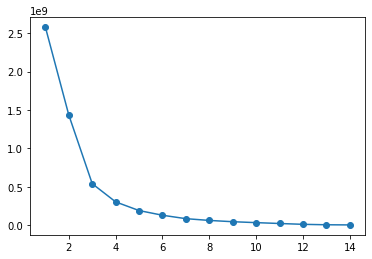

In [79]:

cluster_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias = []
for i in cluster_range:
  kmeans = KMeans(init='k-means++', n_clusters=i,n_init=100, random_state=0).fit(df3)
  inertias.append(kmeans.inertia_)
plt.figure()
plt.plot(cluster_range,inertias, marker ='o')
plt.show()

Our optimum number of clusters is at n=3. Now we fit the K Means Algorithm using the value K=3 



In [80]:
kmeans_sel = KMeans(init ='k-means++',n_clusters=3,n_init=100, random_state=1).fit(df3)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = df3.assign(Cluster =labels)

In [88]:
clustered_data

,q2,q5,QCL_2,q1_Muško,q1_Žensko,Cluster
0,33.0,1500.0,2.0,1,0,0
1,27.0,3000.0,2.0,1,0,1
2,32.0,1500.0,2.0,1,0,0
3,46.0,1500.0,3.0,1,0,0
4,47.0,2000.0,3.0,1,0,0
...,...,...,...,...,...,...
995,47.0,5000.0,3.0,0,1,1
996,34.0,2000.0,2.0,0,1,0
997,40.0,3000.0,3.0,1,0,1
998,48.0,5000.0,3.0,1,0,1


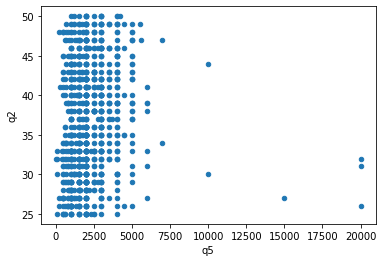

In [98]:
df3.plot(x='q5', y='q2', kind ='scatter')

In [84]:
final = clustered_data.groupby(['Cluster']).mean().round(1)
final

,q2,q5,QCL_2,q1_Muško,q1_Žensko
Cluster,,,,,
0,36.2,1568.0,2.1,0.5,0.5
1,38.8,3719.2,2.2,0.4,0.6
2,29.0,18750.0,2.5,0.2,0.8


My final analysis show that:



cluster 1 are customers of age 36.2 who spend an amount of 1568
cluster 2 are customers of age 38 who spend a minimum amount of 3719.2
Cluster 3 are customers of age 29 who spend 18750 on grocery shopping. 